# 1 Lab Differentable

In [45]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Set global parametrs, function and 1 and second derivate this funcrion

0.6283185307179586


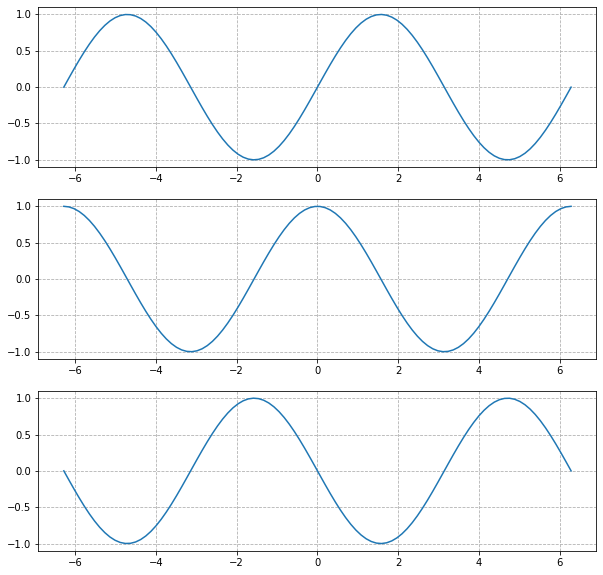

In [273]:
left = -2*np.pi
right = 2*np.pi
n = 100
h = (right - left)/20
print(h)
# func    = lambda x: np.exp(x)
# d1func  = lambda x: np.exp(x)
# d2 func = lambda x: np.exp(x)

# func    = lambda x: np.exp(x)
# d1func  = lambda x: np.exp(x)
# d2 func = lambda x: np.exp(x)

func    = lambda x: np.sin(x)
d1func  = lambda x: np.cos(x)
d2func = lambda x: -np.sin(x)

fig, ax = plt.subplots(3, 1, figsize=(10, 10))

xx = np.linspace(left, right, n)
yy = func (xx)
d1yy = d1func(xx)
d2yy = d2func(xx)

ax[0].plot(xx, yy)
ax[0].grid(ls='--')

ax[1].plot(xx, d1yy)
ax[1].grid(ls='--')

ax[2].plot(xx, d2yy)
ax[2].grid(ls='--')

# Calculate Derivates

### Formuls 

#### First derivate with the first infiniesimal order
> $$ \frac{\partial f(x)}{\partial x_i} =\frac{f(x_i+h)-f(x_i)}{h} \; \; \;\; \;    \;  h\rightarrow \; 0 $$
>
>$$ \frac{\partial f(x)}{\partial x_i}=\frac{f(x_i+h)-f(x_i-h)}{2h}\; \; \; \; \;  \;  h\rightarrow \; 0 $$

#### First derivate with the second infiniesimal order
> $$ \frac{\partial f(x)}{\partial x_i}=\frac{-3f(x_i)+4f(x_i+h)-f(x_i+2h)}{2h}\;\; \; \; \;   \;  h\rightarrow\;  0 $$

#### Second derivate with the first infiniesimal order
>$$ \frac{\partial^2 f(x)}{\partial x_i^2}=\frac{2f(x_i)-5f(x_i+h)+4f(x_i+2h)-f(x_i+3h)}{h^2}\; \; \;\; \;    \;  h\rightarrow \; 0\; \; \;  O(h^2)$$

### We use this in a loop of n iterations (since we have n points). We are not given points further than the right border and therefore we calculate the derivative with respect to the left points adjacent to the segments


### Mean func

#### If we are given a grid of values
>#### Function __d1f_ord1__ is used to find the __first derivative__ of the function with the first infinitesimal order
>
>#### Function __d1f_ord2__ is used to find the __first derivative__ of the function with the second infinitesimal order
>
>#### Function __d2f_ord2__ is used to find the __second derivative__ of the function with the second infinitesimal order

#### If we value at every point (There this need to calulate coef)
>#### Function __d1f_ord1N__ is used to find the __first derivative__ of the function with the first infinitesimal order
>
>#### Function __d1f_ord2N__ is used to find the __first derivative__ of the function with the second infinitesimal order
>
>#### Function __d2f_ord2N__ is used to find the __second derivative__ of the function with the second infinitesimal order

In [274]:
def d1f_ord1(y, h):
    df = np.array([(y[i + 1] - y[i])/h for i in range(y.shape[0] - 1)])
    df = np.append(df , (y[y.shape[0] - 1] - y[y.shape[0] - 2])/h)
    return df
    
def d1f_ord2(y, h):
    
    df = np.array([(-3 * y[i] + 4 * y[i+1] - y[i+2])/(2*h) for i in range(y.shape[0] - 2)])
    df = np.append(df, (3 * y[y.shape[0] - 2] - 4 * y[y.shape[0] - 3] + y[y.shape[0] - 4]) / (2 * h))
    df = np.append(df, (3 * y[y.shape[0] - 1] - 4 * y[y.shape[0] - 2] + y[y.shape[0] - 3]) / (2 * h))
    return df

def d2f_ord2(y, h):
    
    d2f = np.array([(2*y[i] - 5*y[i + 1] + 4*y[i + 2] - y[i + 3])/(h*h) for i in range(len(y) - 3)])
    
    d2f = np.append(d2f, (2*y[len(y) - 3] - 5*y[len(y) - 4] + 4*y[len(y) - 5] - y[len(y) - 6]) / (h*h))
    d2f = np.append(d2f, (2*y[len(y) - 2] - 5*y[len(y) - 3] + 4*y[len(y) - 4] - y[len(y) - 5]) / (h*h))
    d2f = np.append(d2f, (2*y[len(y) - 1] - 5*y[len(y) - 2] + 4*y[len(y) - 3] - y[len(y) - 4]) / (h*h))
    
    return d2f 
 
    
def d1f_ord1N(f, x0, h):
    df = (f(x0 + h) - f(x0))/h
    return df
    
def d1f_ord2N(f, x0, h):
    df = (-3 * f(x0) + 4 * f(x0 + h) - f(x0 + 2*h))/(2*h)
    return df

def d2f_ord2N(f, x0, h):
    
    d2f = (2*f(x0) - 5*f(x0 + h) + 4*f(x0 + 2*h) - f(x0 + 3*h))/(h*h)
    
    return d2f 
     
    

## Plot funcions and his derivate(real and aprroximate)
>### Red color - real graphics
>
>### Blue color - approximane graphics with derivate 

num points: 20, h: 0.6283185307179586


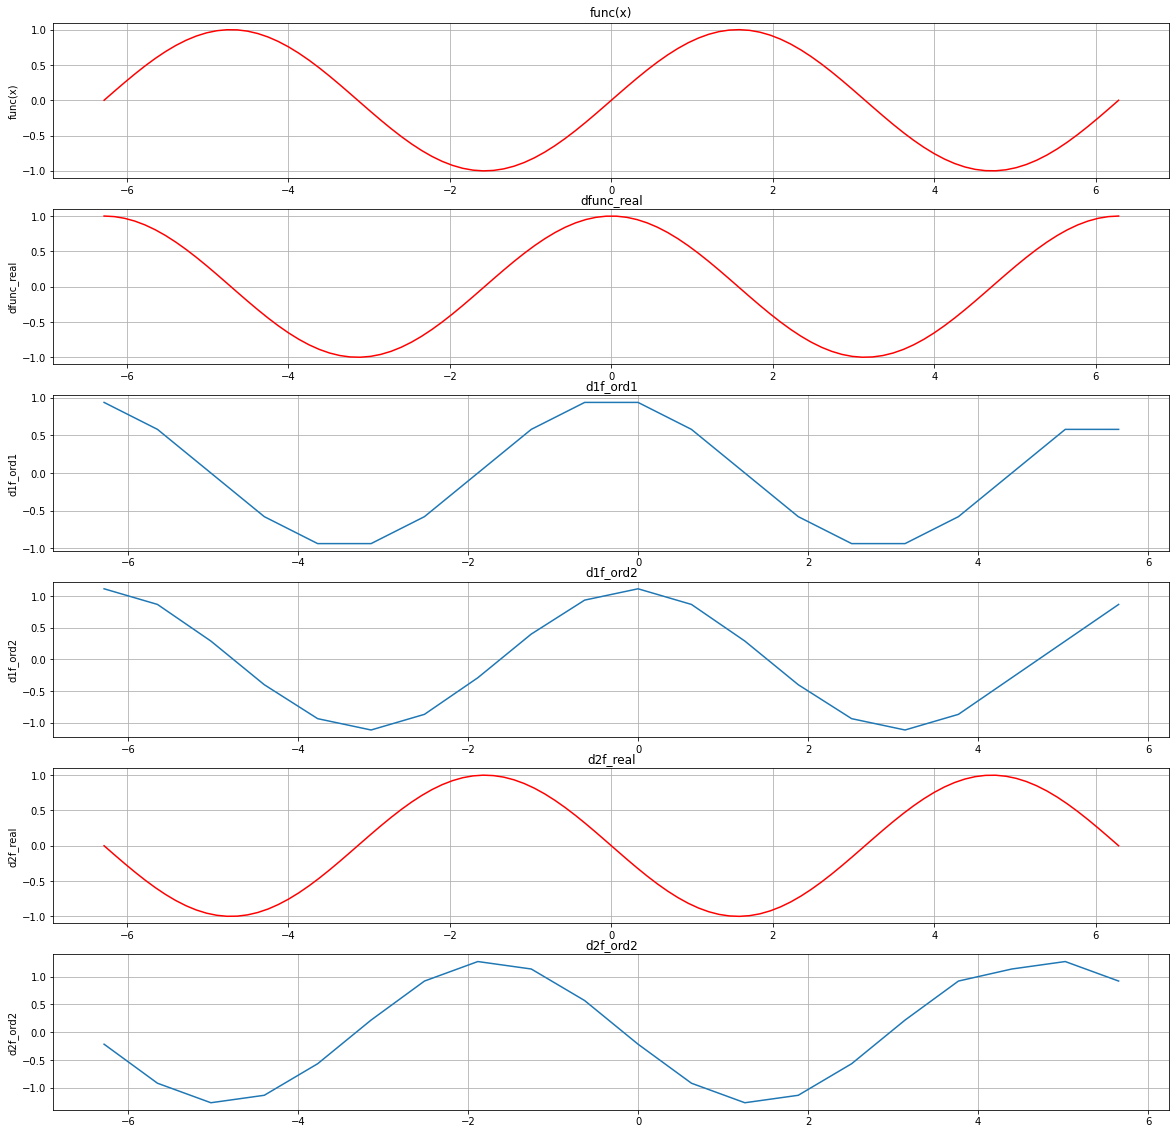

In [275]:
fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(20, 20))


ax[0].set_ylabel("func(x)")
ax[1].set_ylabel("dfunc_real")
ax[2].set_ylabel("d1f_ord1")
ax[3].set_ylabel("d1f_ord2")
ax[4].set_ylabel("d2f_real")
ax[5].set_ylabel("d2f_ord2")

ax[0].set_title("func(x)")
ax[1].set_title("dfunc_real")
ax[2].set_title("d1f_ord1")
ax[3].set_title("d1f_ord2")
ax[4].set_title("d2f_real")
ax[5].set_title("d2f_ord2")

x = np.arange(left, right, h)
y = func(x)
print ("num points: {}, h: {}".format(len(x), h))

xx = np.linspace(left, right, n)
yy = func(xx)

d1yy_real = d1func(xx)
d1yy_ord1 = d1f_ord1(y, h)
d1yy_ord2 = d1f_ord2(y, h)

d2yy_real = d2func(xx)
d2yy_ord2 = d2f_ord2(y, h)

ax[0].plot(xx, yy, c='r')
ax[1].plot(xx, d1yy_real, c='r')
ax[2].plot(x, d1yy_ord1)
ax[3].plot(x, d1yy_ord2)
ax[4].plot(xx, d2yy_real, c='r')
ax[5].plot(x, d2yy_ord2)


for i in range(6):
    ax[i].grid(';')

plt.show()

 How we see. Graphics for real and approximate derivate are visually simiar

# Error

### I am using 2 errors with different norms. 
>#### First err - err using l2 norm:
>>##### $ ||x - y||_{L1} = \sqrt{\sum_{i=0}^{n} (x_i - y_i)^{2}}$
>>
>>##### __x, y - vectors__
>
>#### Second err - err using l1 norm:
>>#### $||x - y||_{L2} = \sum_{i=0}^{n}|x_i - y_i|$
>>
>>##### __x, y - vectors__

In [184]:
# l2 norm 
def EL2(x, y):
    return np.sqrt(((x - y)**2).sum())

def EL1(x, y):
    return (np.abs(x - y)).sum()

## Math error for first derivate

>### $f^{'}(x) \approx f^{'}_{apr} =  \frac{f(x + h) - f(x)}{h} = \frac{f(x) + f^{'}(x)h + f^{''}(x)\frac{h^2}{2} + O(h^3) - f(x)}{h} \Rightarrow $
>
>### $f^{'}(x) + f^{''}(x)\frac{h}{2} + O(h^2) = f^{'}(x) + f{''}(\xi)\frac{h}{2} = f^{'}(x) + O(h) \Rightarrow$ 
>
>### $O(h) = f^{''}(\xi) \Rightarrow$

<font size='4'> If we write this in exact arithmetic: </font>

>### $|f^{'}(x)  - f^{'}_{apr}| \leq E(h) = \frac{M_2}{2}h, M_2 = \max_{x}|f^{''}(x)|$


In [199]:
def MEL2 (f, x, h):
    return np.sqrt(((d2func(x + h/2)*h/2)**2).sum())

def MEL1 (f, x , h):
    return (np.abs(d2func(x + h/2)*h/2)).sum()

## 3 function's errors: L1_Error, L2_Error, Math_Error
<font siZe='3'>How You can see matimatic error coincides with first approximal error. </font>
<font siZe='3'>And Second Approximal error much less than the first approximation    </font>


In [202]:
x = np.arange(left, right, h)
y = func(x)
math_err_l2       = ME(d2func, x, h)
err_real_appr1_l2 = EL2(d1func(x), d1f_ord1(y, h))
err_real_appr2_l2 = EL2(d1func(x), d1f_ord2(y, h))

print("MEL2:                                    {},\nEL2 between real df and approx d1f_ord1: {},\nEL2 between real df and approx d1f_ord2: {}".
      format(math_err_l2, err_real_appr1_l2, err_real_appr2_l2))

MEL2:                                    0.9869604401089359,
EL2 between real df and approx d1f_ord1: 1.0014111053397456,
EL2 between real df and approx d1f_ord2: 0.37896032846467625


<font size='5'>Also, the value 2 of the derivative gives a small error

In [203]:
err_d2_real_aprox = EL2(d2func(x), d2f_ord2(y, h))
print("EL@ between real d2f and approx d2f_ord2: ", err_d2_real_aprox)

EL@ between real d2f and approx d2f_ord2:  1.1367872463424804


Now i want plot errors versus distanse_between
Let's start with find sccater for graph

# Dependence of accuracy on the fineness of the partition

<font size='3'>Now let's write a program that, for each of the derivate approxiamtion formuls, will plot the __error__ versus __the fineness of the partition__ (h). The grid __error__ will be determined as __the maximum of all deviations of the grid values from the function value at the grid points__ (Infiniti norm (L2)).

In [257]:
# def err_for_plot(left, right, border):
#     distanse = (left + (10**10)*border) - left
#     arr_distanse = np.array([])
#     arr_err      = np.array([])
    
#     while distanse >= border:
#         arr_distanse = np.append(arr_distanse, distanse)
#         x = np.arange(left, left + 11*distanse, distanse)
#         y = np.sin(x)
        
#         d1sin = np.cos(x)
#         df_approx_1 = cal_appr_der_1(y, distanse)
#         df_approx_2 = cal_appr_der_2(y, distanse)
        
#         err_math = ((-1/2*np.sin(x + distanse/2)*distanse)**2).sum()
#         err_real_approx_1 = err_der_l2(d1sin, df_approx_1)
#         err_real_approx_2 = err_der_l2(d1sin, df_approx_2)
        
#         arr_err = np.append(arr_err, [err_math, err_real_approx_1, err_real_approx_2])
        
#         if distanse < 1:
#             distanse /= 2.
#         else :
#             distanse -= 0.01
        
#     return (arr_distanse, arr_err)    



def err_for_plot(x0, h, eps):
    arr_distance = np.array([])
    arr_err = np.array([])
    
    d1R = d1func(x0)
    d2R = d2func(x0)
    
    while h > eps:
        arr_distance = np.append(arr_distance, h)
        
        new_err_l2_d1_ord1 = EL2(d1R, d1f_ord1N(func, x0, h))
        new_err_l2_d1_ord2 = EL2(d1R, d1f_ord2N(func, x0, h))
        new_err_l2_math_err = MEL2(func, x0, h)
        new_err_l2_d2_ord2 = EL2(d2R, d2f_ord2N(func, x0, h))
        arr_err = np.append(arr_err, [new_err_l2_math_err, new_err_l2_d1_ord1, new_err_l2_d1_ord2, new_err_l2_d2_ord2])
        
        h /= 2
     
    return (arr_distance, arr_err)
        

In [271]:
# arr_distanse, arr_err = err_for_plot(0, 2*np.pi, 10**(-16))
# arr_err = arr_err.reshape((arr_distanse.shape[0], 3))
# print("Number of scatter:", arr_distanse.shape[0])

x0 = 0.5
h0 = 1
eps = 1e-10
arr_distanse, arr_err = err_for_plot(x0, h0, eps)
arr_err = arr_err.reshape((arr_distanse.shape[0], 4))
print("Number of scatter:", arr_distanse.shape[0])

Number of scatter: 34


<font size='4'>We see a hump on the approximation plots. It is obtained due to the fact that there is machine accuracy. And it causes a spike in the error value on small partitions.</font>

### Let us prove this formally:
>### $f^{'}(x) \approx f^{'}_{apr} =  \frac{f(x + h)(1 + \epsilon_1) - f(x)(1 + \epsilon_2)}{h} = f^{'}(x) + f^{''}(\xi)\frac{h}{2} + \frac{\epsilon_1 f(x + h) - \epsilon_2f(x)}{h}, |\epsilon_k| < \epsilon \Rightarrow $
>
>### $|f^{'}(x) - f^{'}_{apr}| \leq \frac{M_2}{2}  + |\frac{\epsilon_1f(x + h) - \epsilon_2f(x)}{h}| \leq \frac{M_2}{2}h + 2\frac{M_0\epsilon}{h} = E(h)$
>
><font size='4'> UPD: By the way, from this we still find the optimal iteration step, but I was too lazy to do it: </font>
>
>>### $E^{'}(h) = 0 = \frac{M_2}{2}h + 2\frac{M_0\epsilon}{h} \Rightarrow h^{*} = (\frac{4M_0\epsilon}{M_2}), M_0 = \max{x}(f(x)), M_k = \max_{x}(f^{(k)}(x))$




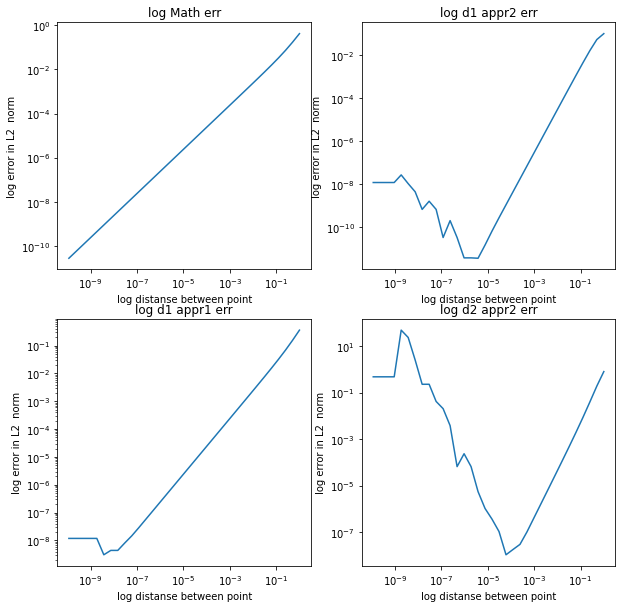

In [277]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

ax[0][0].set_xlabel("log distanse between point")
ax[1][0].set_xlabel("log distanse between point")
ax[0][1].set_xlabel("log distanse between point")
ax[1][1].set_xlabel("log distanse between point")

ax[0][0].set_ylabel("log error in L2  norm")
ax[1][0].set_ylabel("log error in L2  norm")
ax[0][1].set_ylabel("log error in L2  norm")
ax[1][1].set_ylabel("log error in L2  norm")


ax[0][0].set_title("log Math err")
ax[1][0].set_title("log d1 appr1 err")
ax[0][1].set_title("log d1 appr2 err")
ax[1][1].set_title("log d2 appr2 err")

ax[0][0].loglog(arr_distanse, arr_err[:, 0])
ax[1][0].loglog(arr_distanse, arr_err[:, 1])
ax[0][1].loglog(arr_distanse, arr_err[:, 2])
ax[1][1].loglog(arr_distanse, arr_err[:, 3])

# Find linerize coef
## At each point we solve a linear system that form the logarithms of the error

In [260]:
def linearize (X, Y):
    A = np.vstack ([X, np.ones (X.size)]).T
    k, b = np.linalg.lstsq (A, Y, rcond=None)[0]

    return k, b

Number of scatter: 14
k1 = 1.0445675785544835
k2 = 1.0315584665838147
k3 = 1.938249031578859
k4 = 2.0141684999590286


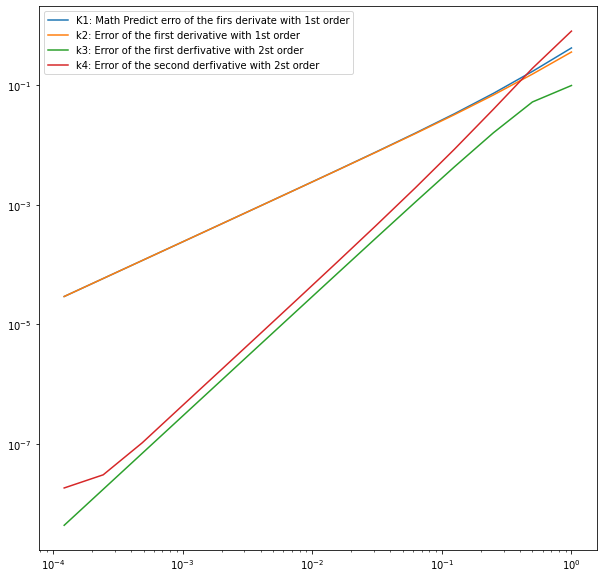

In [267]:
arr_distanse, arr_err = err_for_plot(x0, h0, 1e-4)
arr_err = arr_err.reshape((arr_distanse.shape[0], 4))
print("Number of scatter:", arr_distanse.shape[0])

plt.figure(figsize=(10, 10))
plt.loglog(arr_distanse, arr_err[:, 0], label='K1: Math Predict erro of the firs derivate with 1st order')
plt.loglog(arr_distanse, arr_err[:, 1], label='k2: Error of the first derivative with 1st order')
plt.loglog(arr_distanse, arr_err[:, 2], label='k3: Error of the first derfivative with 2st order')
plt.loglog(arr_distanse, arr_err[:, 3], label='k4: Error of the second derfivative with 2st order')

plt.legend()

k1, b1 = linearize (np.log(arr_distanse), np.log(arr_err[:, 0]))
print ('k1 =', k1) 

k2, b2 = linearize (np.log(arr_distanse), np.log(arr_err[:, 1]))
print ('k2 =', k2)

k3, b3 = linearize (np.log(arr_distanse), np.log(arr_err[:, 2]))
print ('k3 =', k3)

k4, b4 = linearize (np.log(arr_distanse), np.log(arr_err[:, 3]))
print ('k4 =', k4)

# Reuslts 

### As planned, we got 4 coefficients. The upper estimate for the first derivative (1 order of approximation) turned out to be correct.
### ($|f^{'}(x)  - f^{'}_{apr}| \leq E(h) = \frac{M_2}{2}h, M_2 = \max_{x}|f^{''}(x)|$). 
### The dependence of the error of the first derivative of the first order of approximation will be o(h)
### For the first derivative of the 2nd order of approximation, we obtain the dependence on O(h^2). 
### For the second derivative of the 2nd order of approximation, we obtain the dependence on O(h^2). 